In [1]:
import pandas as pd

In [2]:
train = pd.read_csv ('cleandf.csv')

In [ ]:
#Below part is only for MNIST dataset
#For digit 5, output label=1, for any other digit output label=0
y_train=((y_train_full==5).astype(int))  
y_test=((y_test_full==5).astype(int))

In [3]:
train.shape, test.shape

((50882, 16), (21805, 15))

In [3]:
train.head(4)

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,City_Code_C1,...,Is_Spouse_Yes,HealthIndicator_1.0,HealthIndicator_2.0,HealthIndicator_3.0,HealthIndicator_4.0,HealthIndicator_X5,HealthIndicator_X6,HealthIndicator_X7,HealthIndicator_X8,HealthIndicator_X9
0,1,3213,36,36,15.0,3.0,22,11628.0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1117,75,22,5.0,3.0,22,30510.0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,3732,32,32,1.0,1.0,19,7450.0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,4,4378,52,48,15.0,3.0,19,17780.0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [5]:
test.head(4)

,ID,City_Code,Region_Code,Upper_Age,Lower_Age,Is_Spouse,HealthIndicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Reco_Insurance_Type_Individual,Reco_Insurance_Type_Joint,Accomodation_Type_Owned,Accomodation_Type_Rented
0,50883,C1,156,30,30,0,7.574622,6.0,3.0,5,11934.0,1,0,1,0
1,50884,C4,7,69,68,1,9.000000,3.0,3.0,18,32204.8,0,1,1,0
2,50885,C1,564,28,28,0,7.000000,2.0,4.0,17,9240.0,1,0,0,1
3,50886,C3,1177,23,23,0,7.000000,3.0,3.0,18,9086.0,1,0,0,1


In [4]:
train.shape

(50882, 60)

In [5]:
X = train.drop(['Response','ID','Region_Code'], axis = 1)
y = train['Response'] 

In [6]:
X.shape, y.shape

((50882, 57), (50882,))

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X.head()

,Upper_Age,Lower_Age,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,City_Code_C1,City_Code_C10,City_Code_C11,City_Code_C12,...,Is_Spouse_Yes,HealthIndicator_1.0,HealthIndicator_2.0,HealthIndicator_3.0,HealthIndicator_4.0,HealthIndicator_X5,HealthIndicator_X6,HealthIndicator_X7,HealthIndicator_X8,HealthIndicator_X9
0,0.315789,0.338983,1.000000,0.666667,1.000000,0.227609,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.101695,0.285714,0.666667,1.000000,0.687356,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.245614,0.271186,0.000000,0.000000,0.857143,0.125881,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.596491,0.542373,1.000000,0.666667,0.857143,0.377401,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.456140,0.474576,0.142857,0.000000,0.714286,0.197807,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [8]:
print("Data For Training model\n\n","Input data: ", X.shape, "\n", "Output data: ",y.shape)

Data For Training model

 Input data:  (50882, 13) 
 Output data:  (50882,)


In [10]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
print("Training Data :","X_train:", X_train.shape, "--- y_train:", y_train.shape,"\nTesting Data  :" " X_test:",X_test.shape, " --- y_test:",y_test.shape)

Training Data : X_train: (35617, 57) --- y_train: (35617,) 
Testing Data  : X_test: (15265, 57)  --- y_test: (15265,)


In [11]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# define the model
model_xgbc = XGBClassifier()

# fit the model on train data
model_xgbc.fit(X_train, y_train)

# predict on test set
yhat_xgbc = model_xgbc.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(y_test, yhat_xgbc)
print("---------------------------------------------")
print('Accuracy: %.2f' % (accuracy*100))
print("---------------------------------------------")
print(classification_report(y_test,yhat_xgbc))

---------------------------------------------
Accuracy: 75.89
---------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.97      0.86     11667
           1       0.43      0.06      0.11      3598

    accuracy                           0.76     15265
   macro avg       0.60      0.52      0.49     15265
weighted avg       0.69      0.76      0.68     15265



In [12]:
import xgboost as xgb
from xgboost import plot_importance

params = {
    'objective': 'binary:logistic',
    'gamma': 0.1,
    'max_depth': 5,
    'lambda': 3,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'min_child_weight': 3,
    'silent': 1,
    'eta': 0.1,
    'seed': 1000,
    'nthread': 4,
}

num_round = 10

In [13]:


dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
watchlist = [(dtrain, 'train'), (dtest, 'test')]
bst = xgb.train(params, dtrain, num_round, watchlist)
y_pred_xgb = bst.predict(dtest)

[19:21:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-error:0.24182	test-error:0.23655
[1]	train-error:0.24177	test-error:0.23577
[2]	train-error:0.24177	test-error:0.23570
[3]	train-error:0.24177	test-error:0.23570
[4]	train-error:0.24177	test-error:0.23570
[5]	train-error:0.24177	test-error:0.23570
[6]	train-error:0.24177	test-error:0.23570
[7]	train-error:0.24177	test-error:0.23570
[8]	train-error:0.24177	test-error:0.23570
[9]	train-error:0.24177	test-error:0.23570


In [14]:
print('The accuracy of the Neural Network is',round(accuracy_score(throttling(y_pred_xgb, 0.6),y_test)*100,2))

NameError: name 'throttling' is not defined

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

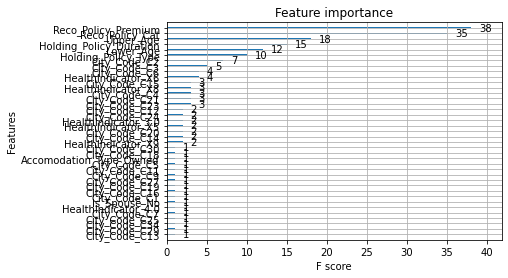

In [15]:
plot_importance(bst)

In [17]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

<Figure size 2880x1440 with 0 Axes>

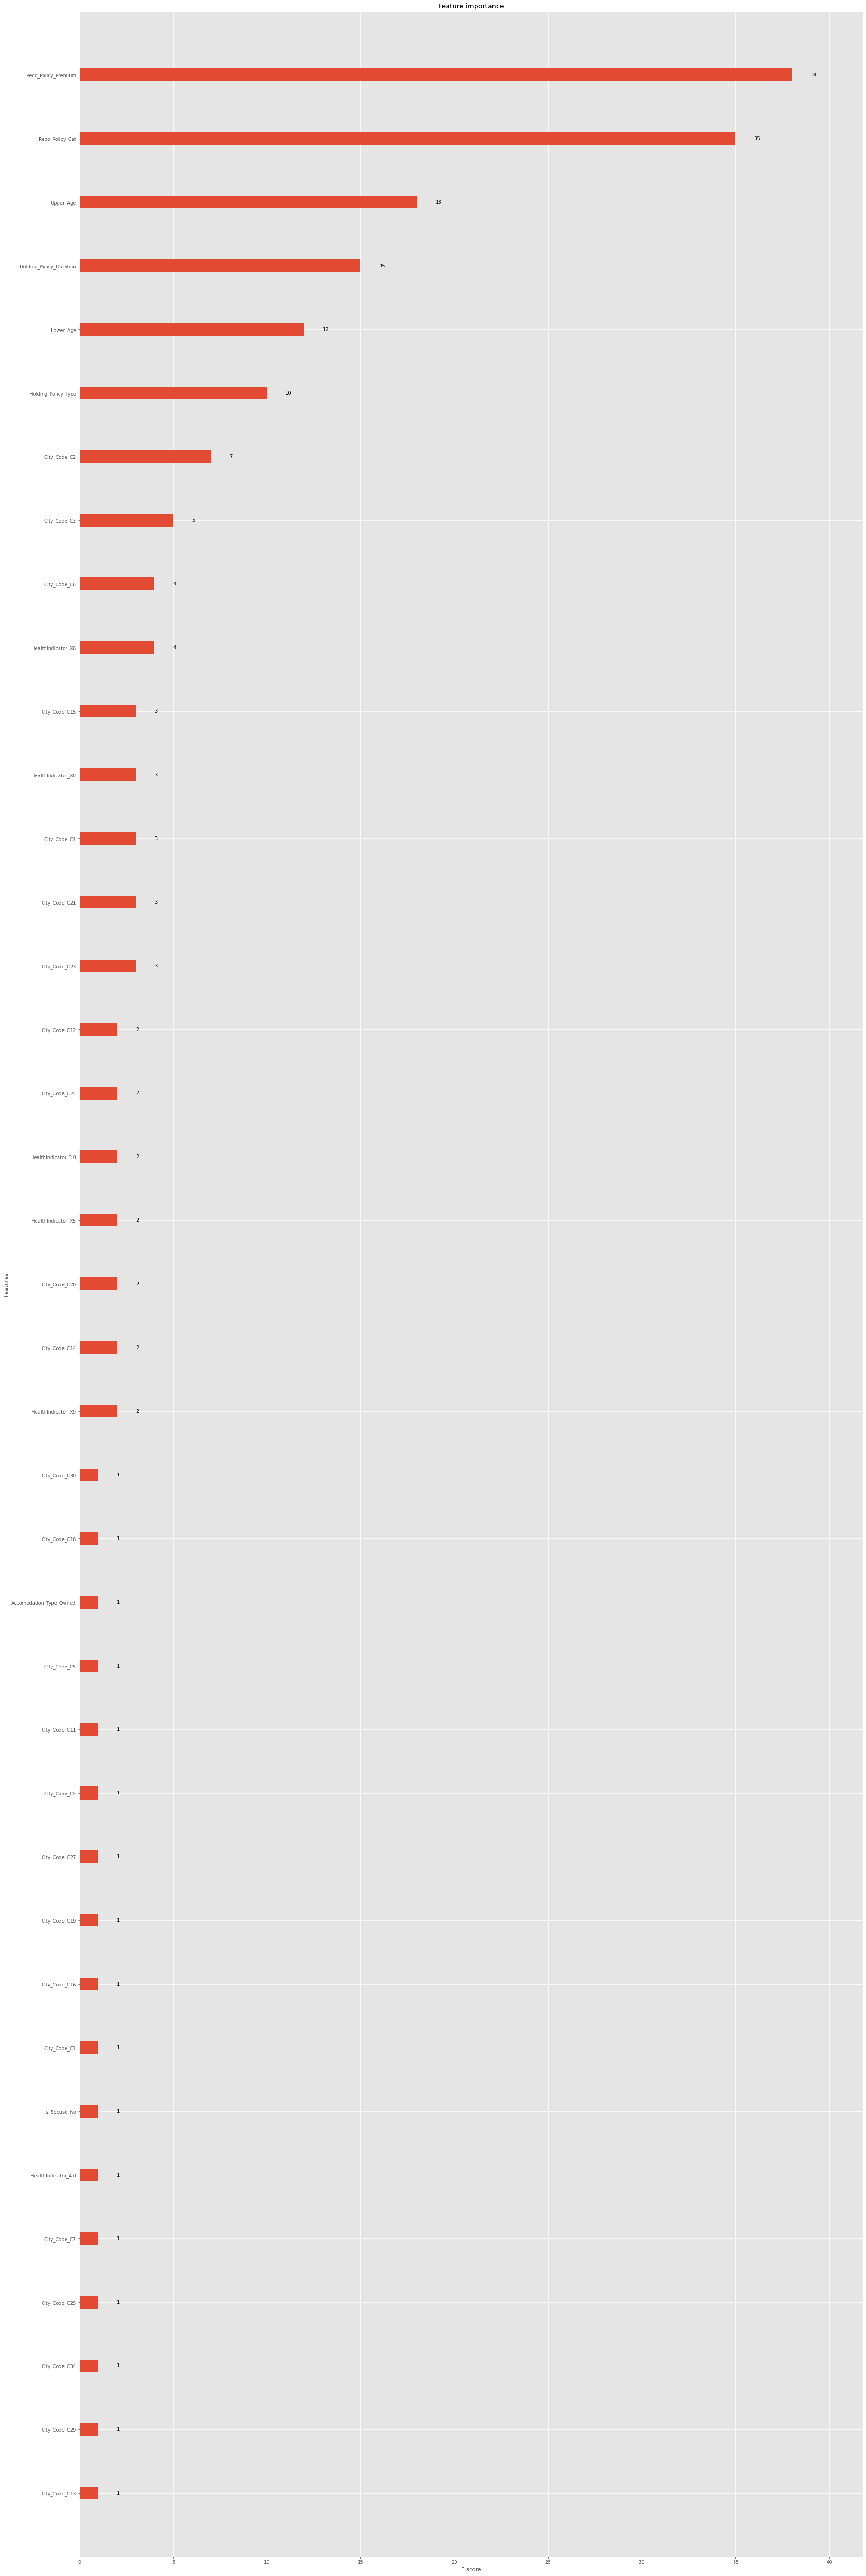

In [21]:
from xgboost import plot_importance
plt.figure(figsize=(40,20))
plot_importance(bst,max_num_features=100)
plt.rcParams["figure.figsize"] = (40,100)
plt.show()

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

model = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
model.fit(X_train, y_train)

# predict on test set
ypred = model.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(y_test, ypred)
print("---------------------------------------------")
print('Accuracy: %.2f' % (accuracy*100))
print("---------------------------------------------")
print(classification_report(y_test,ypred))

---------------------------------------------
Accuracy: 75.63
---------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.98      0.86     11667
           1       0.36      0.04      0.07      3598

    accuracy                           0.76     15265
   macro avg       0.56      0.51      0.47     15265
weighted avg       0.67      0.76      0.67     15265



In [12]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_train, y_train)

Y_pred_lr = lr.predict(X_test)

score_lr = round(accuracy_score(Y_pred_lr,y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 76.43 %


In [13]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

nb.fit(X_train,y_train)
Y_pred_nb = nb.predict(X_test)

score_nb = round(accuracy_score(Y_pred_nb,y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 76.38 %


In [14]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, y_train)

Y_pred_svm = sv.predict(X_test)

score_svm = round(accuracy_score(Y_pred_svm,y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 76.43 %


In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
Y_pred_knn=knn.predict(X_test)

score_knn = round(accuracy_score(Y_pred_knn,y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 73.28 %


In [16]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,y_train)
Y_pred_dt = dt.predict(X_test)

score_dt = round(accuracy_score(Y_pred_dt,y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 65.92 %


In [18]:
!pip install keras

In [20]:
!pip install tensorflow

     |████████████████████████████████| 173.9 MB 1.7 MB/s eta 0:00:012  |█▎                              | 7.0 MB 964 kB/s eta 0:02:54     |██                              | 11.3 MB 787 kB/s eta 0:03:27     |█████▍                          | 29.3 MB 1.2 MB/s eta 0:02:00     |█████▉                          | 31.6 MB 1.4 MB/s eta 0:01:43     |███████                         | 38.0 MB 1.8 MB/s eta 0:01:14     |███████▌                        | 40.8 MB 880 kB/s eta 0:02:32     |██████████████████▏             | 98.9 MB 1.8 MB/s eta 0:00:41     |███████████████████             | 103.8 MB 1.5 MB/s eta 0:00:48     |████████████████████████████    | 152.1 MB 2.3 MB/s eta 0:00:10     |████████████████████████████    | 152.2 MB 2.3 MB/s eta 0:00:10     |████████████████████████████▏   | 153.3 MB 2.3 MB/s eta 0:00:09
     |████████████████████████████████| 127 kB 3.6 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 2.4 MB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB

In [21]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.fit(X_train,y_train,epochs=100)


Epoch 1/100
1114/1114 [==============================] - 5s 4ms/step - loss: 0.5619 - accuracy: 0.7561
Epoch 2/100
1114/1114 [==============================] - 6s 5ms/step - loss: 0.5496 - accuracy: 0.7573
Epoch 3/100
1114/1114 [==============================] - 5s 5ms/step - loss: 0.5460 - accuracy: 0.7596
Epoch 4/100
1114/1114 [==============================] - 4s 4ms/step - loss: 0.5478 - accuracy: 0.7576
Epoch 5/100
1114/1114 [==============================] - 5s 4ms/step - loss: 0.5439 - accuracy: 0.7608
Epoch 6/100
1114/1114 [==============================] - 4s 4ms/step - loss: 0.5448 - accuracy: 0.7604
Epoch 7/100
1114/1114 [==============================] - 4s 4ms/step - loss: 0.5497 - accuracy: 0.7559
Epoch 8/100
1114/1114 [==============================] - 4s 4ms/step - loss: 0.5459 - accuracy: 0.7583
Epoch 9/100
1114/1114 [==============================] - 4s 3ms/step - loss: 0.5465 - accuracy: 0.7578
Epoch 10/100
1114/1114 [==============================] - 6s 6ms/step - l

In [22]:
Y_pred_nn = model.predict(X_test)

In [23]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [24]:
score_nn = round(accuracy_score(Y_pred_nn,y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

#Note: Accuracy of 85% can be achieved on the test set, by setting epochs=2000, and number of nodes = 11. 

The accuracy score achieved using Neural Network is: 76.43 %
